In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
import sklearn
import sklearn.metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC 
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline

Loading BokehJS ...

In [10]:
# loading the data
titanic = pd.read_csv('C:/Users/VISHAL/Downloads/Titanic.CSV')

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# getting info.
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


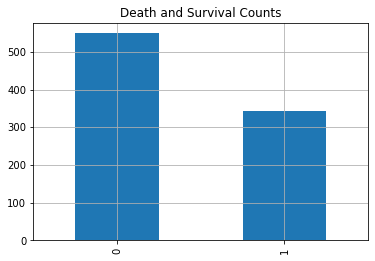

In [17]:
titanic['Survived'].value_counts().plot(kind='bar',title='Death and Survival Counts',grid=True)
plt.show()

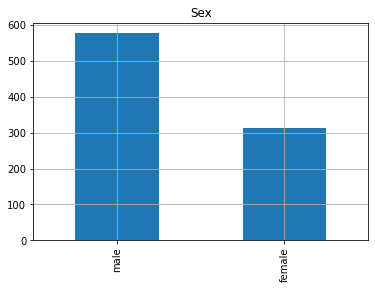

In [18]:
titanic['Sex'].value_counts().plot(kind='bar',title='Sex',grid=True)
plt.show()

In [19]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

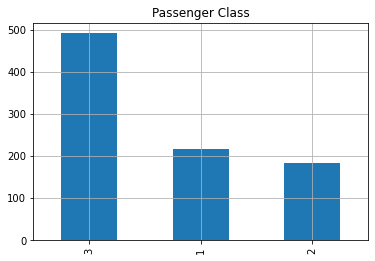

In [20]:
titanic['Pclass'].value_counts().plot(kind='bar',title='Passenger Class',grid=True)
plt.show()

In [21]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

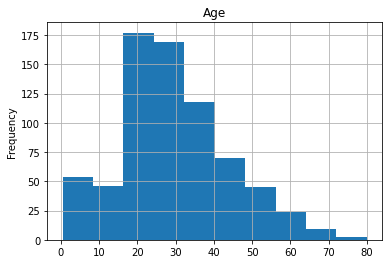

In [25]:
titanic['Age'].plot(kind='hist',title='Age',grid=True)
plt.show()

In [46]:
rel_1=pd.crosstab(titanic['Pclass'],titanic['Survived'])
print(rel_1)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

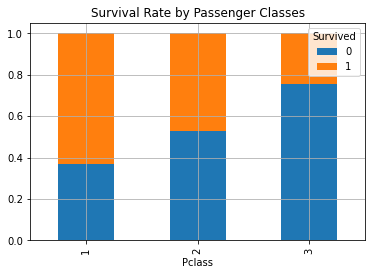

In [45]:
rel_1=pd.crosstab(titanic['Pclass'],titanic['Survived'])
rel_1=pd.normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1=pd.normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlable("Passenger Class")
plt.ylable("Survival Rate")
plt.show()

In [56]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']

In [57]:
# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

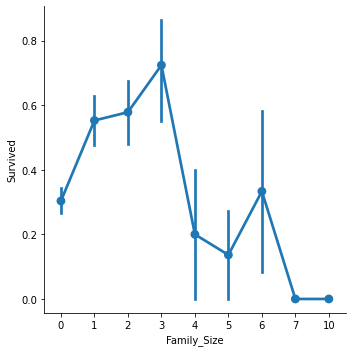

In [58]:
# Factorplot for Family_Size
sns.factorplot(x ='Family_Size', y ='Survived', data = titanic)

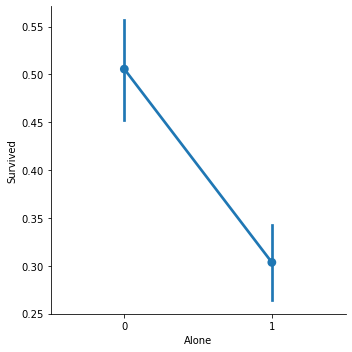

In [59]:
# Factorplot for Alone
sns.factorplot(x ='Alone', y ='Survived', data = titanic)

<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

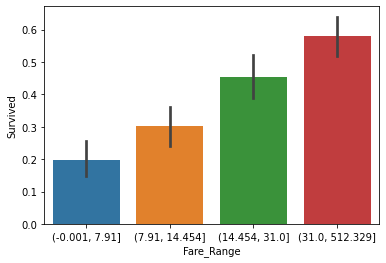

In [60]:
# Divide Fare into 4 bins
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = titanic)

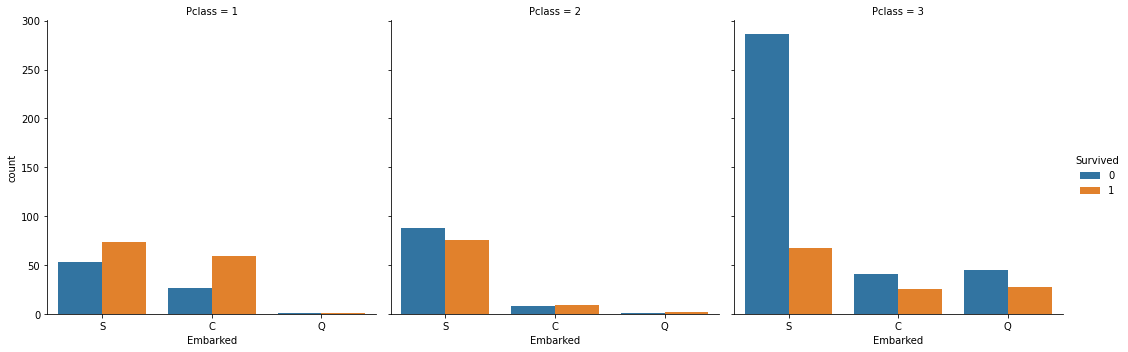

In [61]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = titanic)